#Dita Noviyanti/1301194125

Formulasi masalah yang akan diselesaikan ialah antara variabel umur dengan lama berlangganan. Dimana akan dilakukan pengelompokan pelanggan berdasarkan umur terhadap lama berlangganan. Hubungan diantara keduanya ialah untuk melihat kelompok pelanggan berdasar umurnya dengan lama berlangganannya sehingga dapat ditentukan kelompok usia berapa yang banyak berlangganan di dealer tersebut. Selain itu juga kedua data tersebut memiliki jenis data yang sama. Kemudian akan dilakukan pengelompokan data atau clustering

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random as rd

In [ ]:
#upload data melalui gdrive
from google.colab import drive
drive.mount('/content/drive')

df_train = pd.read_excel('/content/drive/My Drive/ml/kendaraan_train.xlsx')

Mounted at /content/drive


In [ ]:
#melihat dataset train
df_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [ ]:
#melihat deskripsi dataset train
df_train.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
#chek missing value pada data train
df_train.isna().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [ ]:
#chek persentase nilai masing-masing missing value
length = len(df_train)
count = df_train.count()
jumlh_missingValue = ((length - count)/length).round(4)*100
print(jumlh_missingValue)

id                   0.00
Jenis_Kelamin        5.05
Umur                 4.97
SIM                  5.04
Kode_Daerah          5.01
Sudah_Asuransi       4.98
Umur_Kendaraan       4.99
Kendaraan_Rusak      4.96
Premi                5.10
Kanal_Penjualan      5.00
Lama_Berlangganan    4.90
Tertarik             0.00
dtype: float64


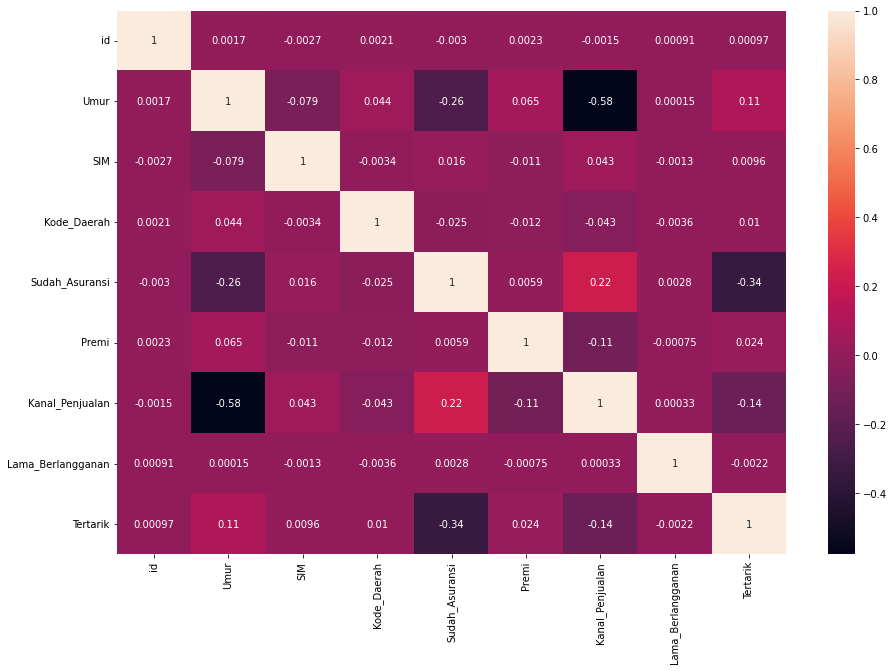

In [ ]:
#melihat korelasi 
df_korrel = df_train.corr()
fig, ax= plt.subplots(figsize=(15,10))
sns.heatmap(df_korrel,annot=True, ax=ax)

#Membuat Dataset Umur dan Lama Berlangganan


In [ ]:
#membuat dataset baru
dfCls = df_train.loc[:,["Umur", "Lama_Berlangganan"]]
dfCls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 2 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur               271617 non-null  float64
 1   Lama_Berlangganan  271839 non-null  float64
dtypes: float64(2)
memory usage: 4.4 MB


In [ ]:
#cek nilai missing value
dfCls.isna().sum()

Umur                 14214
Lama_Berlangganan    13992
dtype: int64

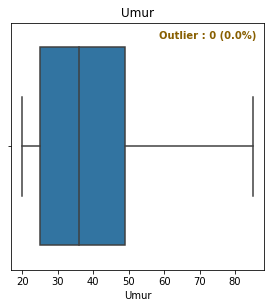

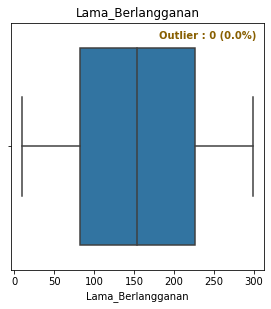

In [ ]:
#melihat apakah ada outlier
def findOutliner(x):
  Q1 = x.quantile(0.25)
  Q3 = x.quantile(0.75)
  IQR = Q3 - Q1

  count=((x < (Q1 - 1.5 * IQR)) | (x > (Q3 + 1.5 * IQR))).sum()
  percentage=round(((count/len(x))*100),2)
  return count,percentage

plt.figure(figsize=(10, 10))
ax1=plt.subplot(221)
sns.boxplot(data=dfCls,x='Umur')
plt.text(x=0.97, y=0.97,transform=ax1.transAxes,s=f"Outlier : {findOutliner(dfCls['Umur'])[0]} ({findOutliner(dfCls['Umur'])[1]}%)",\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
plt.title("Umur")
plt.show()

plt.figure(figsize=(10, 10))
ax2=plt.subplot(221)
sns.boxplot(data=dfCls,x='Lama_Berlangganan')
plt.text(x=0.97, y=0.97,transform=ax2.transAxes,s=f"Outlier : {findOutliner(dfCls['Lama_Berlangganan'])[0]} ({findOutliner(dfCls['Lama_Berlangganan'])[1]}%)",\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
plt.title('Lama_Berlangganan')
plt.show()

In [ ]:
#handle missing value
dfCls['Lama_Berlangganan']=dfCls['Lama_Berlangganan'].fillna(dfCls['Lama_Berlangganan'].mode()[0])
dfCls['Umur']=dfCls['Umur'].fillna(dfCls['Umur'].mode()[0])

In [ ]:
#cek missing value setelah dilakukan handling
dfCls.isna().sum()

Umur                 0
Lama_Berlangganan    0
dtype: int64

In [ ]:
dfCls.head(3)

,Umur,Lama_Berlangganan
0,30.0,97.0
1,48.0,158.0
2,21.0,119.0


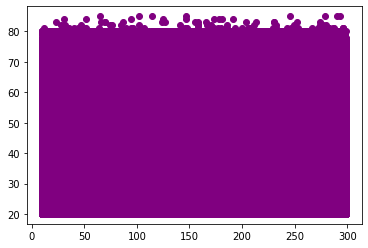

In [ ]:
#plot dataset 
df_umur = dfCls.Umur.tolist()
df_lamaberlangganan = dfCls.Lama_Berlangganan.tolist()

list_cluster= []
for i in range(len(df_lamaberlangganan)):
  list_cluster.append([df_umur[i],df_lamaberlangganan[i]])

list_cluster = np.array(list_cluster)

plt.scatter(list_cluster[:,1], list_cluster[:,0], color='purple', cmap='viridis')

# KMeans

In [ ]:
class kmeansAlgorithmCls2:

    #function contructor 
    def __init__(self, dataset, K):
        self.data = dataset.values
        self.a_label = dataset.columns[0]         
        self.b_label = dataset.columns[1]         
        self.K = K                      # jumlah clusters
        self.m = self.data.shape[0]     # jumlah sample training 
        self.n = self.data.shape[1]     # jumlah features
        self.hasil = {}
        self.centroids = np.array([]).reshape(self.n, 0)
    
    #funtion inisialisasi centroid secara random
    def inisialisal_rd_centroids(self, data, K):
        centroid = np.array([]).reshape(self.n, 0) 
        for i in range(self.K):
            rand = rd.randint(0, self.m-1)
            centroid = np.c_[centroid, self.data[rand]]

        return centroid

    #function fit model    perhitungan jarak, clustering, centroid baru
    def fit(self, num_iter):
        #inisialisasi centroid
        self.centroids = self.inisialisal_rd_centroids(self.data, self.K)
        
        for i in range(num_iter):

            #distance
            dist = np.array([]).reshape(self.m, 0)    #inisialisasi dist
            for k in range(self.K):
                jarak = np.sum((self.data - self.centroids[:,k])**2, axis=1)
                dist = np.c_[dist, jarak]
            # mengambil jarak terdekat
            min_jarak = np.argmin(dist, axis=1) + 1

            # Begin iterations
            temp = {} # penampung sementara clustering setiap iterasi

            for k in range(self.K):
                temp[k+1] = np.array([]).reshape(self.n, 0)

            for i in range(self.m):
                # regroup data points berdasarkan cluster index
                temp[min_jarak[i]] = np.c_[temp[min_jarak[i]], self.data[i]]

            for k in range(self.K):
                temp[k+1] = temp[k+1].T

            # Updating centroids pada cluster 
            for k in range(self.K):
                self.centroids[:,k] = np.mean(temp[k+1], axis=0)

            self.hasil = temp
            
    #function plot kmeans
    def plot_kmeans(self):
        colors = ["#"+''.join([rd.choice('0123456789ABCDEF') for j in range(6)]) \
                  for i in range(self.K)]
        labels = ['cluster_' + str(i+1) for i in range(self.K)]
        fig1 = plt.figure(figsize=(15,8))
        ax1 = plt.subplot(111)
        # plot setiap cluster
        for k in range(self.K):
                ax1.scatter(self.hasil[k+1][:,0], self.hasil[k+1][:,1],c = colors[k], label = labels[k], s=20)
        # plot centroids
        ax1.scatter(self.centroids[0,:], self.centroids[1,:],
                                s = 70, c = 'black', label = 'centroids')
        plt.xlabel(self.a_label) 
        plt.ylabel(self.b_label) 
        plt.title('Plot of K Means Clustering Algorithm')
        plt.legend()

        return plt.show()  
    
    def predict(self):
        return self.hasil, self.centroids.T

    

#ELBOW 

Text(0, 0.5, 'Inertia')

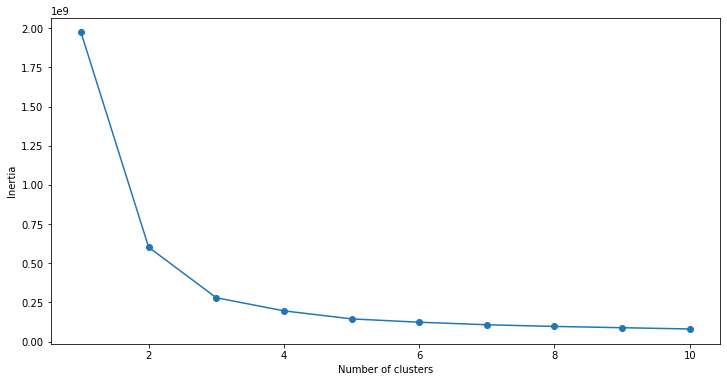

In [ ]:
from sklearn.cluster import KMeans
WCSS = []
for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(dfCls)
    WCSS.append(kmeans.inertia_)

frame = pd.DataFrame({'Cluster':range(1,11), 'WCSS':WCSS})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['WCSS'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# Visualisasi Kmeans
Nilai K yang digunakan ialah berasal dari perhitungan dengan elbow method

cen awal [[ 48.  24.  30.]
 [ 85. 268. 292.]]
temp {}
cen baru [[ 38.27244094  37.24485284  40.65543325]
 [ 98.40016479 227.15488781 288.11938127]]
hasil {1: array([[ 30.,  97.],
       [ 48., 158.],
       [ 21., 119.],
       ...,
       [ 63., 147.],
       [ 21.,  50.],
       [ 45.,  44.]]), 2: array([[ 50., 194.],
       [ 33., 215.],
       [ 23., 222.],
       ...,
       [ 42., 230.],
       [ 23., 217.],
       [ 23., 226.]]), 3: array([[ 25., 282.],
       [ 66., 281.],
       [ 25., 284.],
       ...,
       [ 50., 278.],
       [ 59., 289.],
       [ 68., 270.]])}
temp {}
cen baru [[ 38.12424129  37.96104509  38.3645552 ]
 [ 92.46535105 210.32925609 278.62459172]]
hasil {1: array([[ 30.,  97.],
       [ 48., 158.],
       [ 21., 119.],
       ...,
       [ 63., 147.],
       [ 21.,  50.],
       [ 45.,  44.]]), 2: array([[ 50., 194.],
       [ 21., 171.],
       [ 33., 215.],
       ...,
       [ 42., 230.],
       [ 23., 217.],
       [ 23., 226.]]), 3: array([[ 25., 282.

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


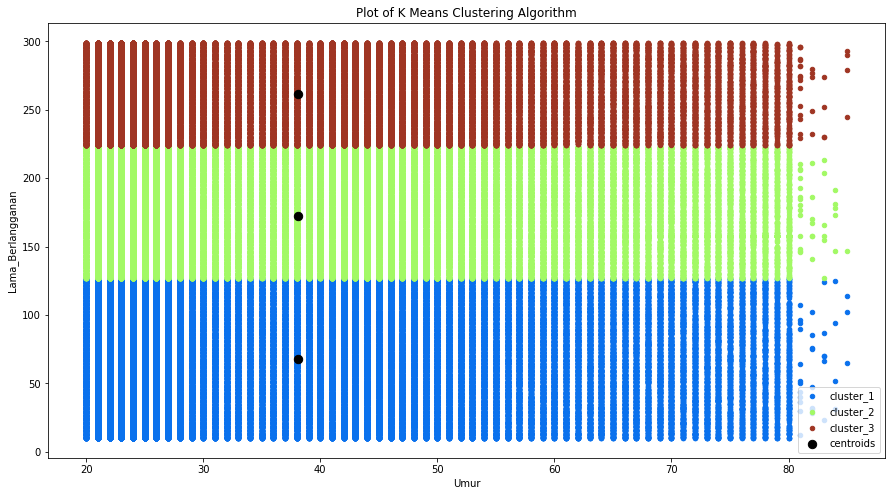

In [ ]:
#eksperiment 1
'''
pada eksperiment satu dicoba melakukan clustering dengan iterasi = 5
'''
df_kmeans = dfCls
K_clusters = 3
num_iter = 5


kmeans = kmeansAlgorithmCls2(df_kmeans, K_clusters)
kmeans.fit(num_iter)
kmeans.plot_kmeans()
pred = kmeans.predict()

cen awal [[ 43.  54.  66.]
 [110. 231. 259.]]
temp {}
cen baru [[ 37.98772652  37.12384588  40.3846355 ]
 [ 96.15494669 213.29192242 276.42085997]]
hasil {1: array([[ 30.,  97.],
       [ 48., 158.],
       [ 21., 119.],
       ...,
       [ 63., 147.],
       [ 21.,  50.],
       [ 45.,  44.]]), 2: array([[ 50., 194.],
       [ 33., 215.],
       [ 23., 222.],
       ...,
       [ 42., 230.],
       [ 23., 217.],
       [ 23., 226.]]), 3: array([[ 25., 282.],
       [ 66., 281.],
       [ 25., 284.],
       ...,
       [ 29., 260.],
       [ 25., 264.],
       [ 68., 270.]])}
temp {}
cen baru [[ 38.10814122  38.00715404  38.29148237]
 [ 82.01836706 193.76484157 272.09654754]]
hasil {1: array([[ 30.,  97.],
       [ 21., 119.],
       [ 58.,  63.],
       ...,
       [ 63., 147.],
       [ 21.,  50.],
       [ 45.,  44.]]), 2: array([[ 48., 158.],
       [ 50., 194.],
       [ 21., 171.],
       ...,
       [ 42., 230.],
       [ 23., 217.],
       [ 23., 226.]]), 3: array([[ 25., 282.

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


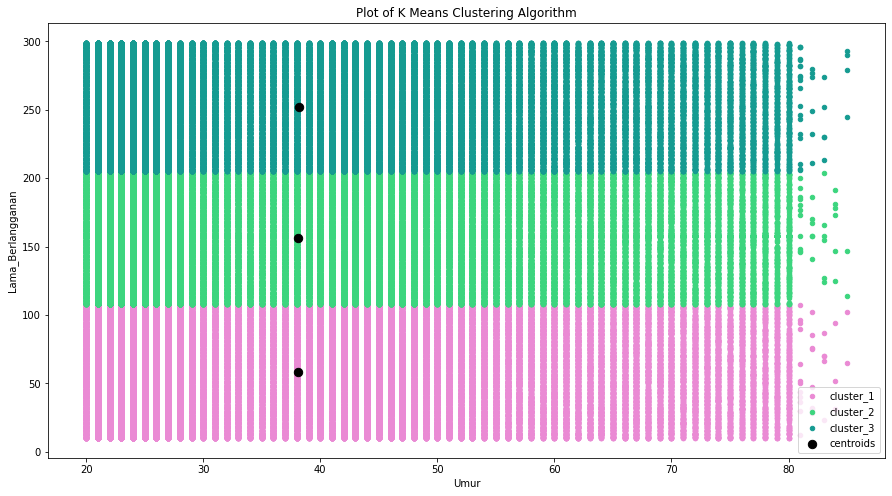

In [ ]:
#eksperiment 2
'''
dilakukan dengan menggunakan iterasi = 100
'''
df_kmeans = dfCls
K_clusters = 3
num_iter = 100


kmeans = kmeansAlgorithmCls2(df_kmeans, K_clusters)
kmeans.fit(num_iter)
kmeans.plot_kmeans()
pred = kmeans.predict()

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


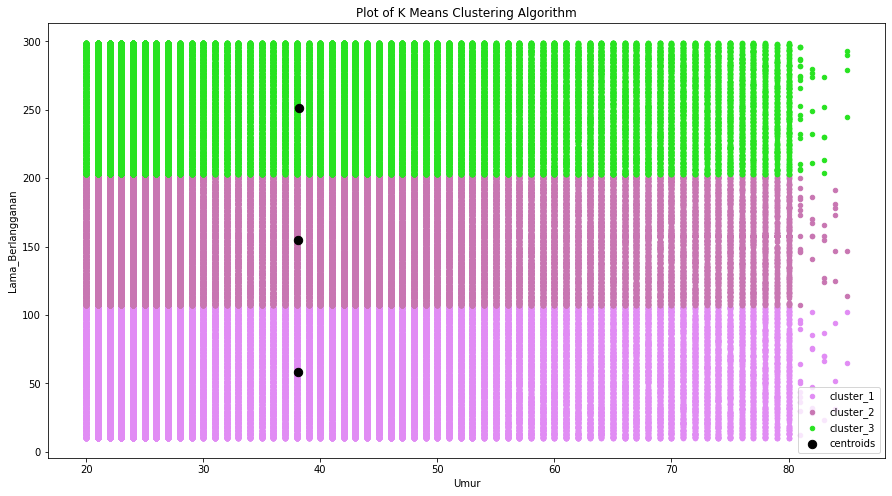

In [ ]:
#eksperiment 3
'''
dilakukan dengan menggunakan iterasi = 100 untuk 
'''
df_kmeans = dfCls
K_clusters = 3
num_iter = 100


kmeans = kmeansAlgorithmCls2(df_kmeans, K_clusters)
kmeans.fit(num_iter)
kmeans.plot_kmeans()
pred = kmeans.predict()

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


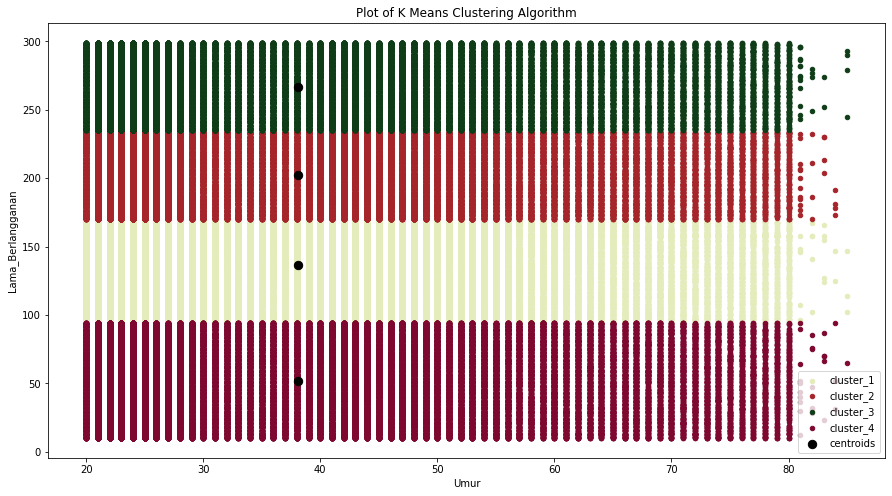

In [ ]:
df_kmeans = dfCls
K_clusters = 4
num_iter = 100


kmeans = kmeansAlgorithmCls2(df_kmeans, K_clusters)
kmeans.fit(num_iter)
kmeans.plot_kmeans()
pred = kmeans.predict()

# Kmeans Clustering usaha mempercepat waktu running time
Untuk mempercepat waktu running program digunakan variabel tambahan yaitu diff, hal ini dikarenakan sebelum menggunakan diff waktu running yang dibutuhkan sangatlah lama untuk 100 iterasi hal ini dikarenakan tidak ada variabel penghentian apabila ternyata centroid telah optimum atau bernilai sama setelah iterasi + 1 karna syarat loopingnya adalah sampai range n_iterasi

In [ ]:
#Kmeans dengan menggunakan tambahan diff
class kmeansAlgorithmCls:

    #function contructor 
    def __init__(self, dataset, K):
        self.data = dataset.values
        self.a_label = dataset.columns[0]         
        self.b_label = dataset.columns[1]         
        self.K = K                      # jumlah clusters
        self.m = self.data.shape[0]     # jumlah sample training 
        self.n = self.data.shape[1]     # jumlah features
        self.hasil = {}
        self.centroids = np.array([]).reshape(self.n, 0)
    
    #funtion inisialisasi centroid secara random
    def inisialisal_rd_centroids(self, data, K):
        centroid = np.array([]).reshape(self.n, 0) 
        for i in range(self.K):
            rand = rd.randint(0, self.m-1)
            centroid = np.c_[centroid, self.data[rand]]

        return centroid

    #function fit model    
    def fit(self, num_iter):
        #inisialisasi centroid
        self.centroids = self.inisialisal_rd_centroids(self.data, self.K)
        for i in range(num_iter):
            prev = self.centroids
            #perhitungan jarak
            dist = np.array([]).reshape(self.m, 0)    #inisialisasi dist
            for k in range(self.K):
                jarak = np.sum((self.data - self.centroids[:,k])**2, axis=1)
                dist = np.c_[dist, jarak]
            # mengambil jarak terdekat
            min_jarak = np.argmin(dist, axis=1) + 1

            # Begin iterations
            temp = {} # penampung sementara clustering setiap iterasi

            for k in range(self.K):
                temp[k+1] = np.array([]).reshape(self.n, 0)

            for i in range(self.m):
                # regroup data points berdasarkan cluster index
                temp[min_jarak[i]] = np.c_[temp[min_jarak[i]], self.data[i]]

            for k in range(self.K):
                temp[k+1] = temp[k+1].T

            # Updating centroids pada cluster 
            for k in range(self.K):
                self.centroids[:,k] = np.mean(temp[k+1], axis=0)

            self.hasil = temp
            #digunakan untuk menghentikan interasi ketika centroid sudah optimum
           
            diff = prev-self.centroids
            if not diff.any():
              print(" ")
              break
            
    #function plot kmeans
    def plot_kmeans(self):
        colors = ["#"+''.join([rd.choice('0123456789ABCDEF') for j in range(6)]) \
                  for i in range(self.K)]
        labels = ['cluster_' + str(i+1) for i in range(self.K)]
        fig1 = plt.figure(figsize=(15,8))
        ax1 = plt.subplot(111)
        # plot setiap cluster
        for k in range(self.K):
                ax1.scatter(self.hasil[k+1][:,0], self.hasil[k+1][:,1],c = colors[k], label = labels[k], s=20)
        # plot centroids
        ax1.scatter(self.centroids[0,:], self.centroids[1,:],
                                s = 70, c = 'black', label = 'centroids')
        plt.xlabel(self.a_label) 
        plt.ylabel(self.b_label) 
        plt.title('Plot of K Means Clustering Algorithm')
        plt.legend()

        return plt.show()  
    
    def predict(self):
        return self.hasil, self.centroids.T

    

#Visualisasi

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


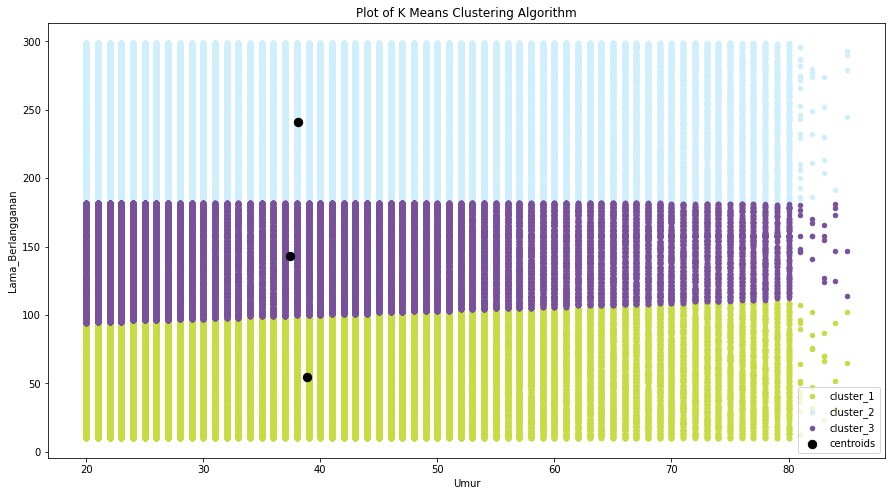

In [ ]:
#eksperiment 2.1
df_kmeans = dfCls
K_clusters = 3
num_iter = 100


kmeans = kmeansAlgorithmCls(df_kmeans, K_clusters)
kmeans.fit(num_iter)
kmeans.plot_kmeans()
pred = kmeans.predict()

cen awal [[ 26.  23.  80.]
 [270.  49. 140.]]
prev [[ 26.  23.  80.]
 [270.  49. 140.]]
cen baru [[ 37.15570898  36.51010463  40.31766009]
 [248.90934679  56.72612176 151.51317285]]
hasil {1: array([[ 33., 215.],
       [ 23., 222.],
       [ 25., 282.],
       ...,
       [ 23., 217.],
       [ 23., 226.],
       [ 68., 270.]]), 2: array([[30., 97.],
       [58., 63.],
       [20., 31.],
       ...,
       [23., 51.],
       [21., 50.],
       [45., 44.]]), 3: array([[ 48., 158.],
       [ 21., 119.],
       [ 50., 194.],
       ...,
       [ 24., 172.],
       [ 26., 145.],
       [ 63., 147.]])}
diff [[0. 0. 0.]
 [0. 0. 0.]]
 


/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


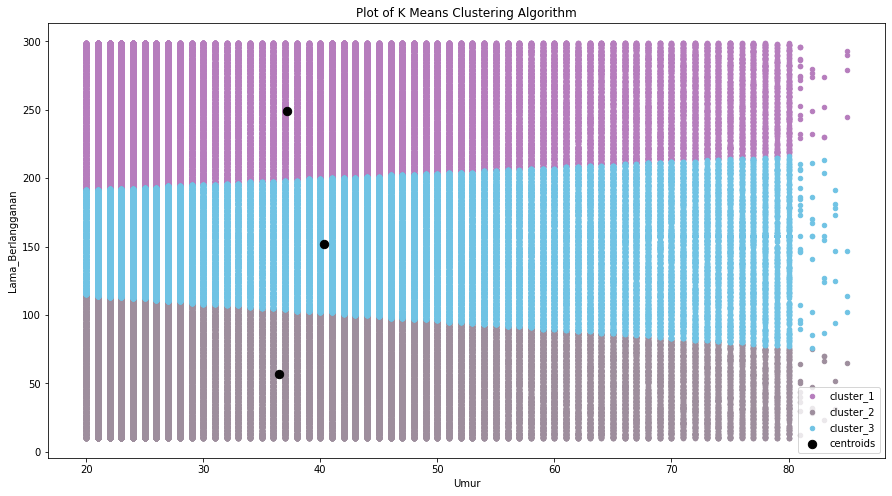

In [ ]:
#eksperiment 2.2
df_kmeans = dfCls
K_clusters = 3
num_iter = 100


kmeans = kmeansAlgorithmCls(df_kmeans, K_clusters)
kmeans.fit(num_iter)
kmeans.plot_kmeans()
pred = kmeans.predict()

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


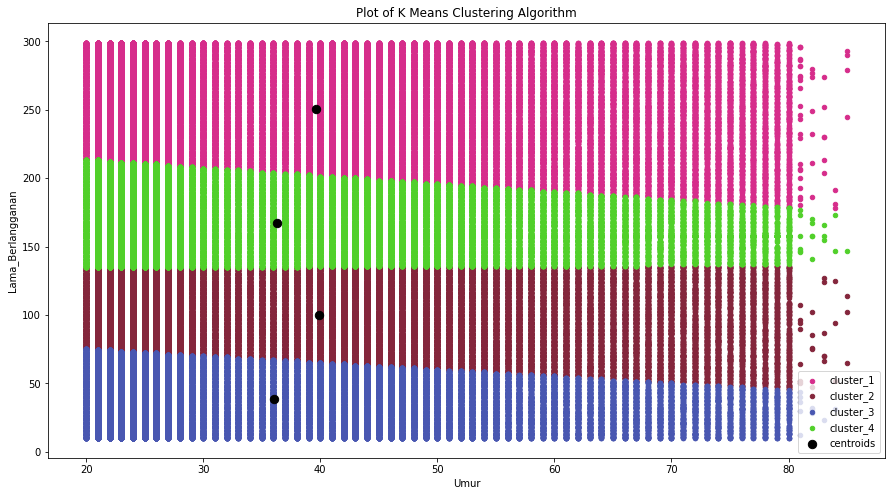

In [ ]:
#eksperiment 2.3
df_kmeans = dfCls
K_clusters = 4
num_iter = 100


kmeans = kmeansAlgorithmCls(df_kmeans, K_clusters)
kmeans.fit(num_iter)
kmeans.plot_kmeans()
pred = kmeans.predict()

#Penjelasan Eksperiment


diff = merupakan variabel yang saya buat untuk menghentikan iterasi ketika centroid sama dengan centroid+1 (centroid baru)

Ketika program saya tidak menggunakan variabel diff program berjalan dengan waktu 1jam dan ketika saya telusuri untuk nilai centroidnya ternyata pada iterasi sebelum 100 nilai centroid dengan centroid+1 sama namun program tetap berjalan sesuai dengan nilai iterasi yang didefinisikan

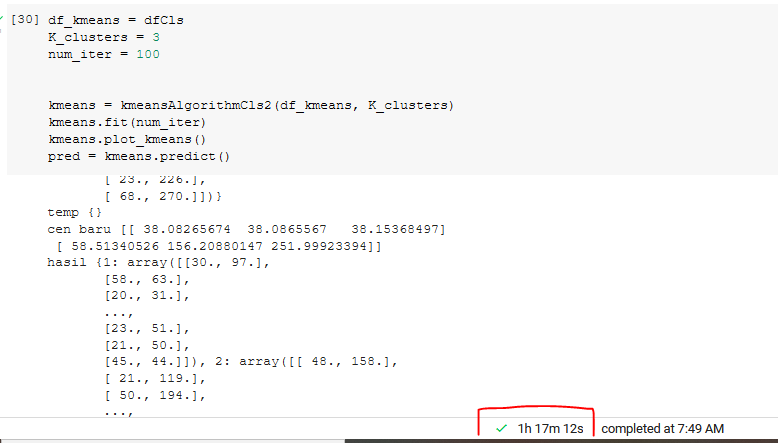

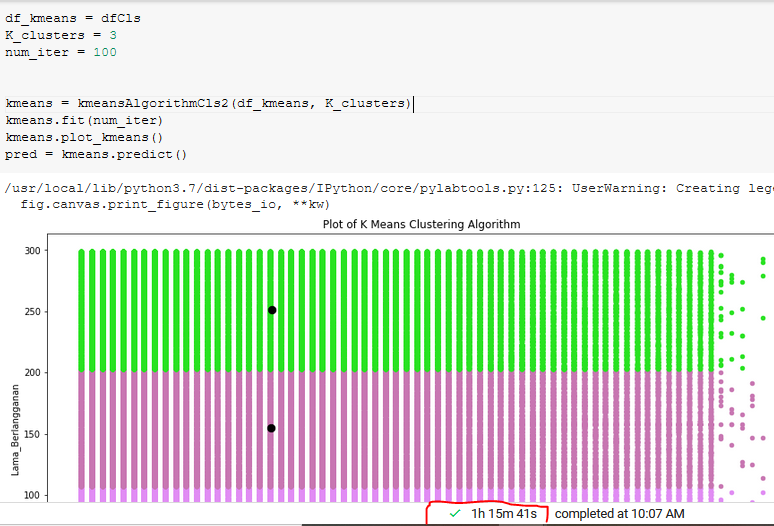

Setelah saya menambahkan variabel diff waktu running program menjadi lebih singkat

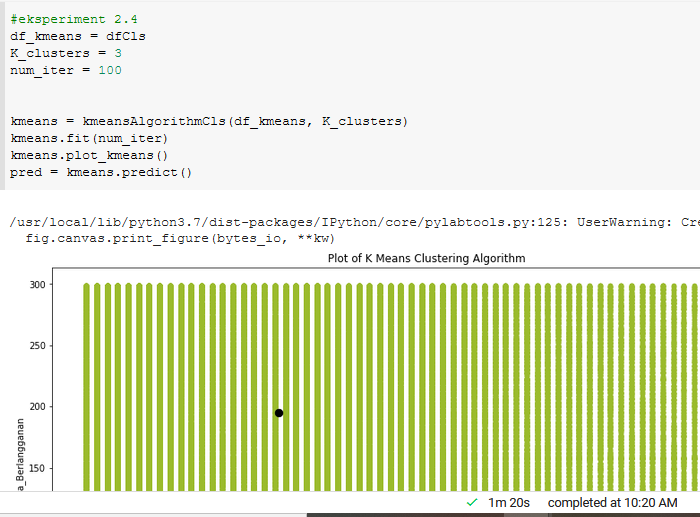

#Sekian Terimakasih! 